```
Sreejith S
U4A1 - Neural Networks-Keras-Boston_Housing_Price
```

In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

%reload_ext autoreload
%matplotlib inline
%autoreload 2
%config InlineBackend.figure_format = 'retina'

#set pd display options
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 80)

Using TensorFlow backend.


## Read and understand the Boston Housing Price dataset [\[link\]](https://www.kaggle.com/vikrishnan/boston-house-prices). Try to understand the features, the target variable, and the number of instances/samples.

### Load Data

In [5]:
headers = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
dataframe = pd.read_csv("../datasets/housing.csv", delim_whitespace=True, 
                        names=headers)

dataset = dataframe.values
X = dataset[:,0:13] 
y = dataset[:,13] #MEDV

dataframe.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


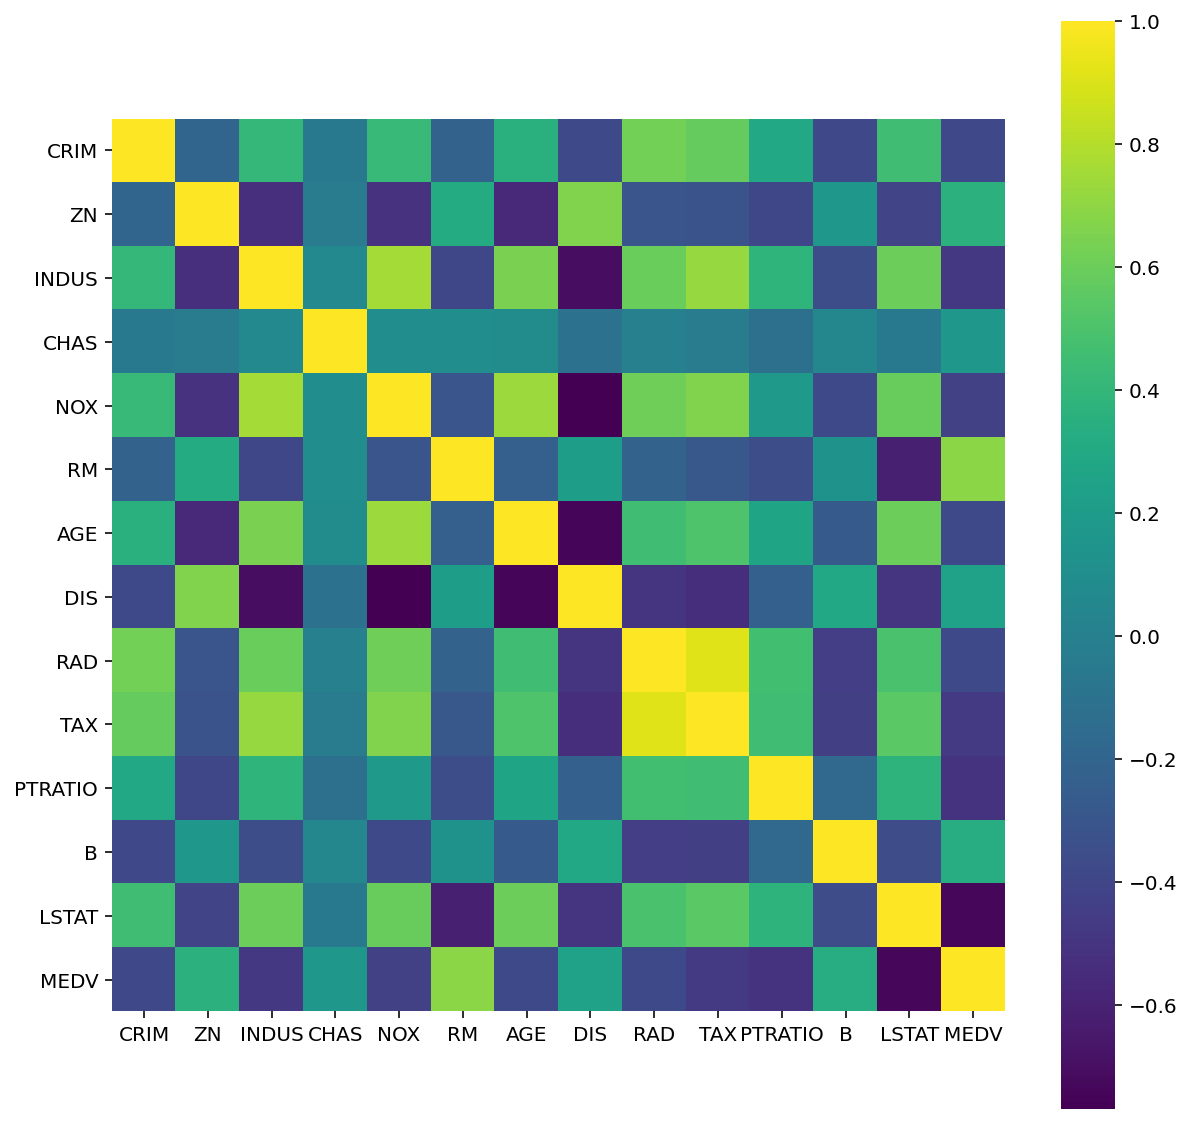

In [6]:
fig = plt.figure(figsize=(10, 10))
sns.heatmap(dataframe.corr() ,square = True, cmap='viridis'
           #,annot=True, fmt='.2g'
           )
plt.show()

From the correlation matrix `RM - avg. number of rooms` has strong positive correlation to `MEDV` while `LSTAT` , `INDUS` and `PTRATIO` have high negative correlation. This conforms with obvious logical conclusions that can be drawn, for example a lower `PTRATIO` will imply access to higher quality education and hence the housing price will be higher in those areas. Similarly, `RM` (more rooms) means bigger house and higher price and so on.

## Create a new colab/jupyter notebook and then try to plot each feature (scatter plot each feature vs. the target variable). Do you see any relationships?

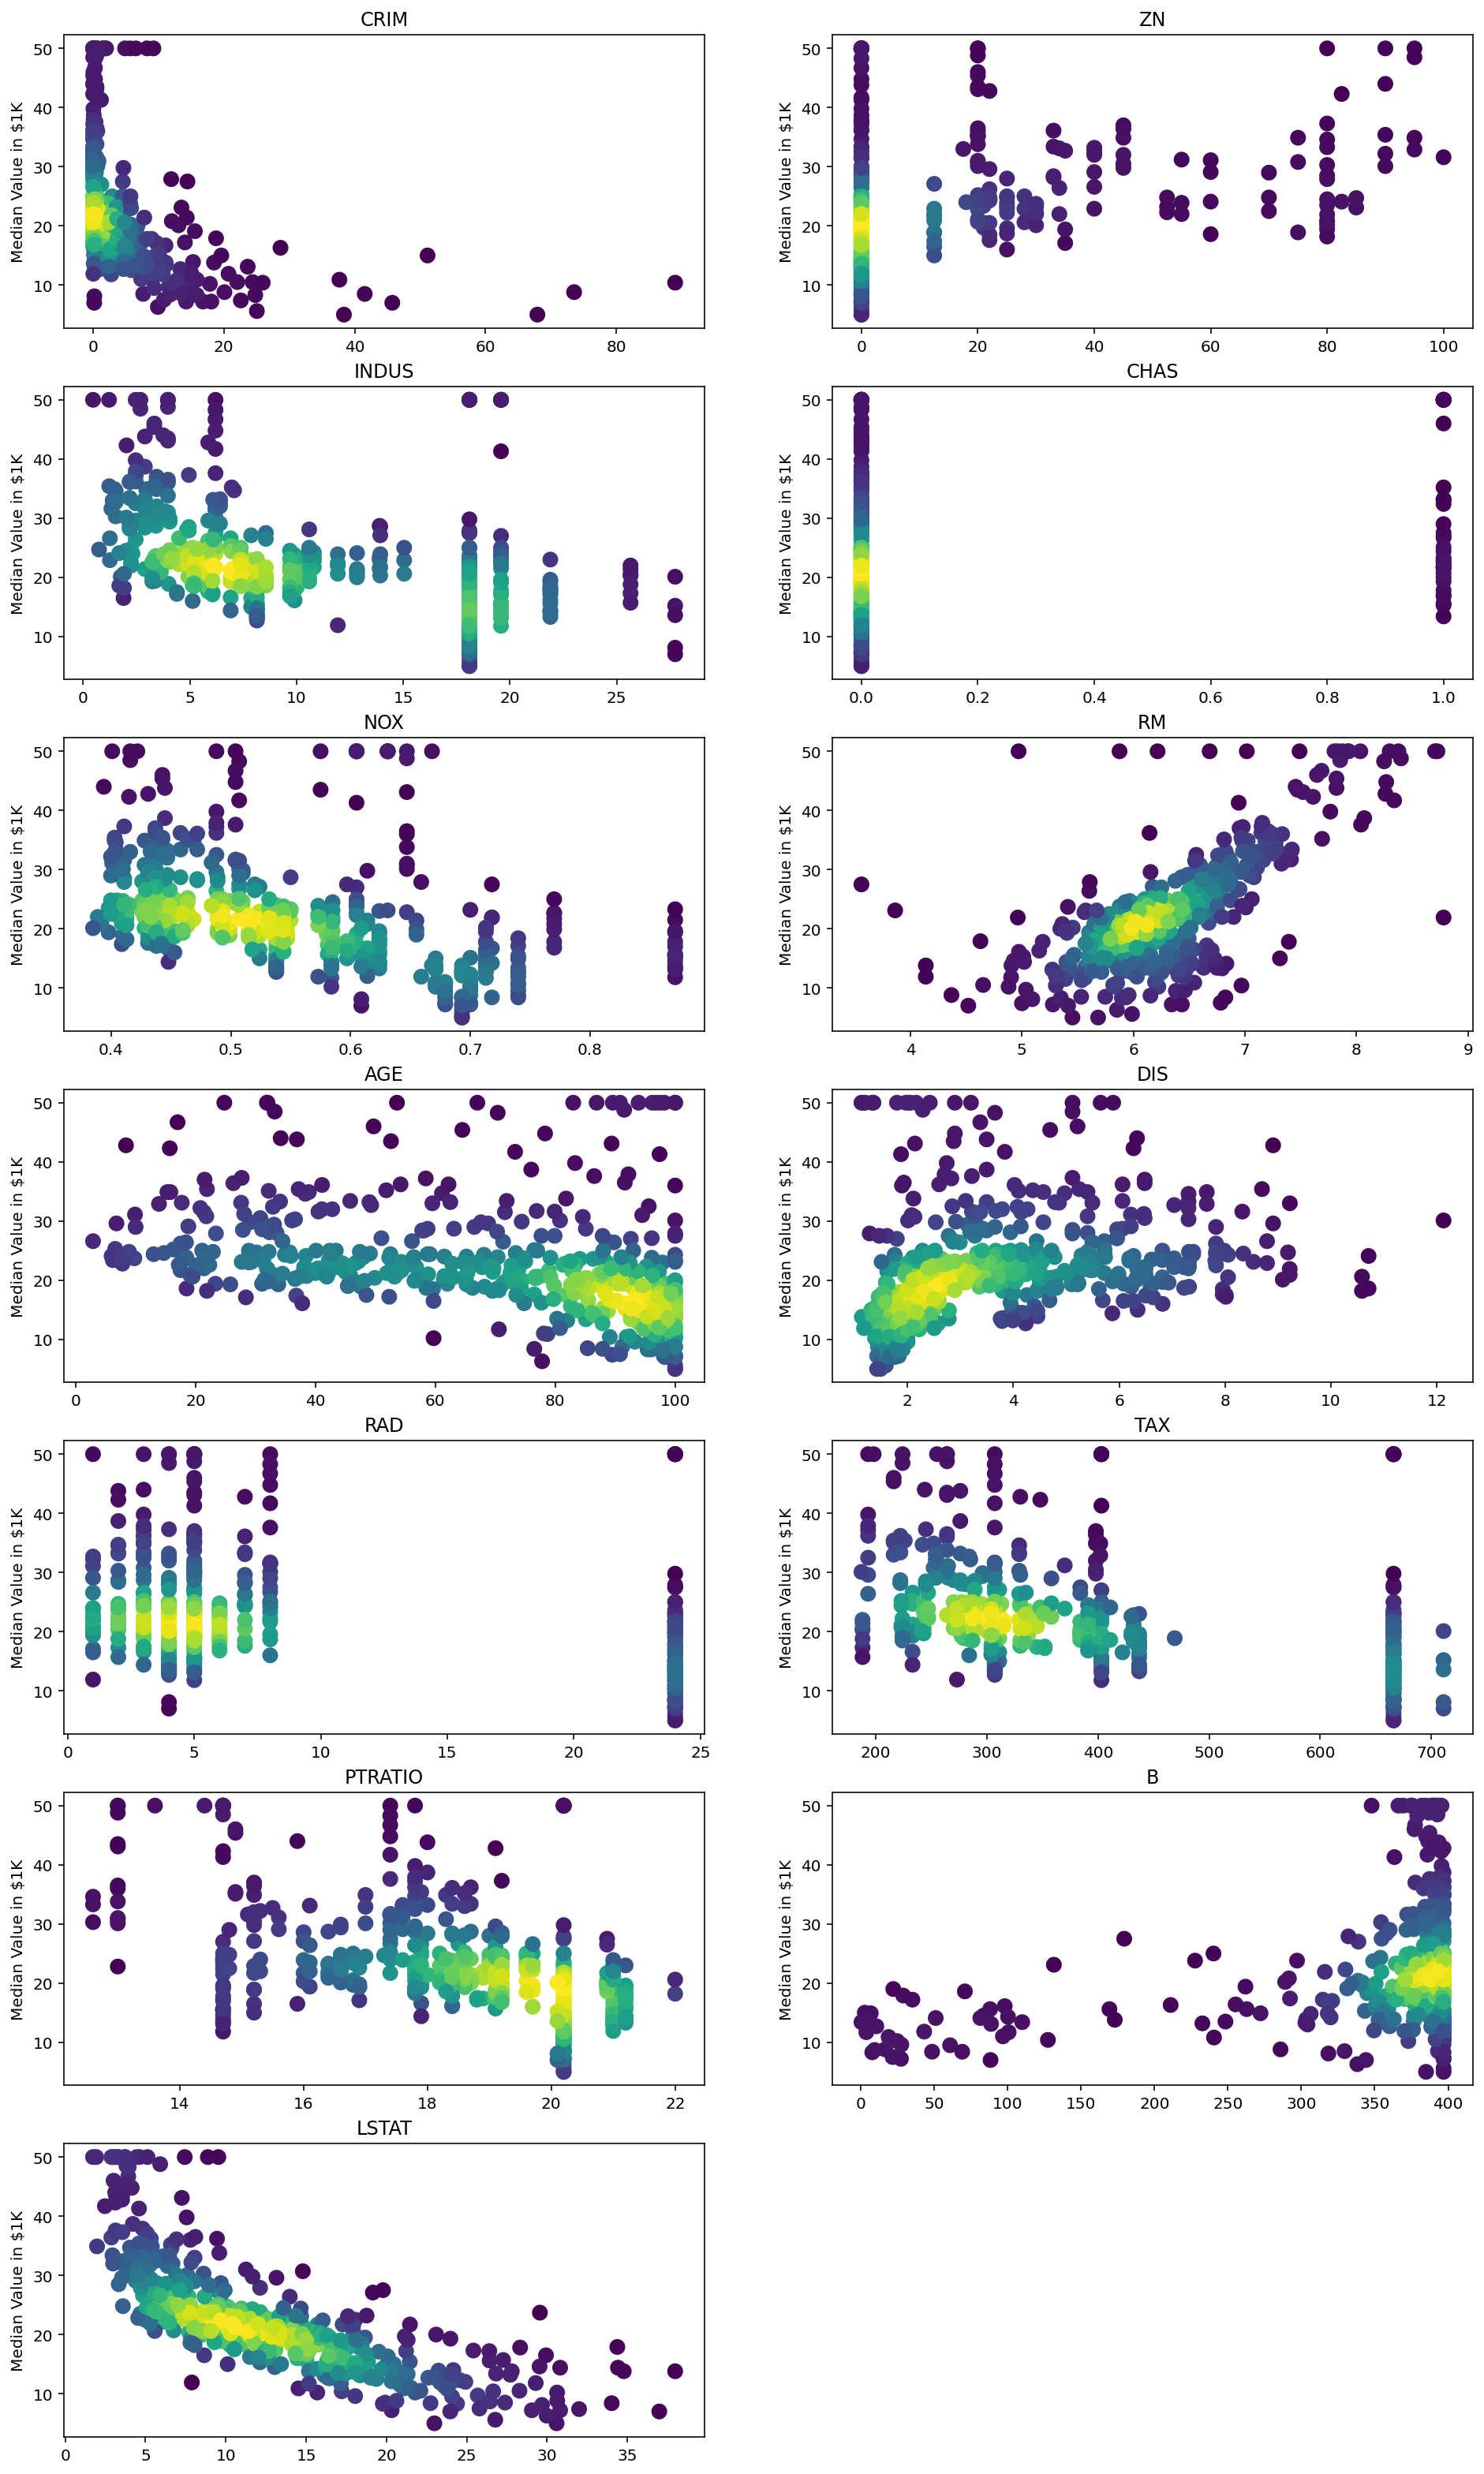

In [4]:
fig =  plt.figure(figsize=(16,28))
for i in range(13):
    x = X[:, i]
    ax = fig.add_subplot(7, 2, i+1)
    
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    ax.scatter(x, y, c=z, s=100, edgecolor='')

    #plt.show()
    #ax.scatter(X[:,i], y)
    ax.set_title(headers[i])
    ax.set_ylabel("Median Value in $1K")
    #ax.set_ylim(-1,2)

plt.show()

`CRIM`, `LSTAT`, `NOX`, `INDUS` : Negative relation exists. Housing is more concentrated away from industrial areas and shows a strong negative correlation. NOX and INDUS has a strong positive correlation. Hence NOX and MEDV shows a strong negative correlation.

`ZN` vs `MEDV`: Most of the houses might be in zone 0. A slight positive relationship might exist.
`CHAS`:  More houses are away from the riverfront, but does seem to factor much into pricing.

`RM`: Somewhat linear positive relationship.

`AGE`: Slightly strong negative relationship.

`DIS`: Distance to work shows slightly strong positive relationship to housing pricing. 

`PTRATIO`: With lower `PTRATIO` house prices seems higher.




## Read through this step by step guide [\[link\]](https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/) on building your first neural network model using keras and scikit learn packages. Read and implement the “Baseline Neural Network Model”

### Baseline Model

In [7]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=5, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X, y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -34.42 (20.96) MSE


## Continue reading, and complete the standardized model using standard scalar based feature scaling.

In [8]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=baseline_model, epochs=50, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Standardized: -29.74 (24.32) MSE
